<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-fraud-detection/blob/main/data-preparation/kaggle_etherscan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_k = pd.read_csv('/content/drive/MyDrive/ethereum-fraud-detection/data/transaction_data_kaggle.csv').drop(columns=['Unnamed: 0'])
df_k.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

In [5]:
df_k.drop_duplicates(subset=["Address"], inplace=True)
add = df_k[['Address']]
df_k.drop(['Index', 'Address'], axis=1, inplace=True)

In [6]:
# Find categorical features
categories = df_k.select_dtypes('O').columns

for catg in categories:
    count = df_k[catg].nunique()
    print(f'The categorical column {catg} has {count} unique values')


The categorical column  ERC20 most sent token type has 304 unique values
The categorical column  ERC20_most_rec_token_type has 466 unique values


In [7]:
# Find neumerical features
numericals = df_k.select_dtypes(include=['float', 'int']).columns

for num in numericals:
    unique_values_count = df_k[num].nunique()
    print(f'The numerical feature {num} has {unique_values_count} unique values')

The numerical feature FLAG has 2 unique values
The numerical feature Avg min between sent tnx has 5013 unique values
The numerical feature Avg min between received tnx has 6223 unique values
The numerical feature Time Diff between first and last (Mins) has 7810 unique values
The numerical feature Sent tnx has 641 unique values
The numerical feature Received Tnx has 727 unique values
The numerical feature Number of Created Contracts has 20 unique values
The numerical feature Unique Received From Addresses has 256 unique values
The numerical feature Unique Sent To Addresses has 258 unique values
The numerical feature min value received has 4589 unique values
The numerical feature max value received  has 6302 unique values
The numerical feature avg val received has 6767 unique values
The numerical feature min val sent has 4719 unique values
The numerical feature max val sent has 6647 unique values
The numerical feature avg val sent has 5854 unique values
The numerical feature min value se

In [8]:
# Feature variances
df_k[numericals].var()

,0
FLAG,1.727250e-01
Avg min between sent tnx,4.616454e+08
Avg min between received tnx,5.324319e+08
Time Diff between first and last (Mins),1.042427e+11
Sent tnx,5.747996e+05
Received Tnx,8.873719e+05
Number of Created Contracts,2.005778e+04
Unique Received From Addresses,8.939983e+04
Unique Sent To Addresses,6.977606e+04
min value received,1.064405e+05


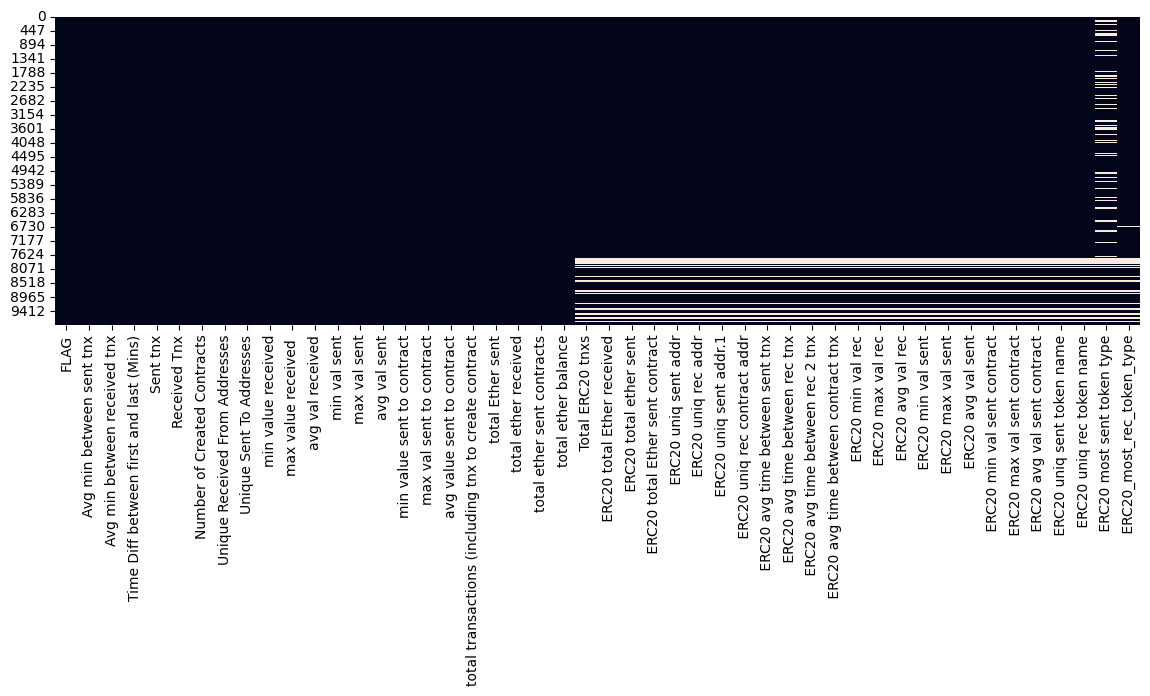

In [9]:
# Visualize missing values
plt.figure(figsize=(14,4))
sns.heatmap(df_k.isnull(), cbar=False)
plt.show()

In [10]:
# Drop Categorical Features
df_k.drop(list(categories), axis=1, inplace=True)

# Replace missing values with mean
df_k.fillna(df_k.median(), inplace=True)

# Drop features with 0 variance
zero_var_features = df_k.var() == 0
df_k.drop(df_k.var()[zero_var_features].index, axis=1, inplace=True)

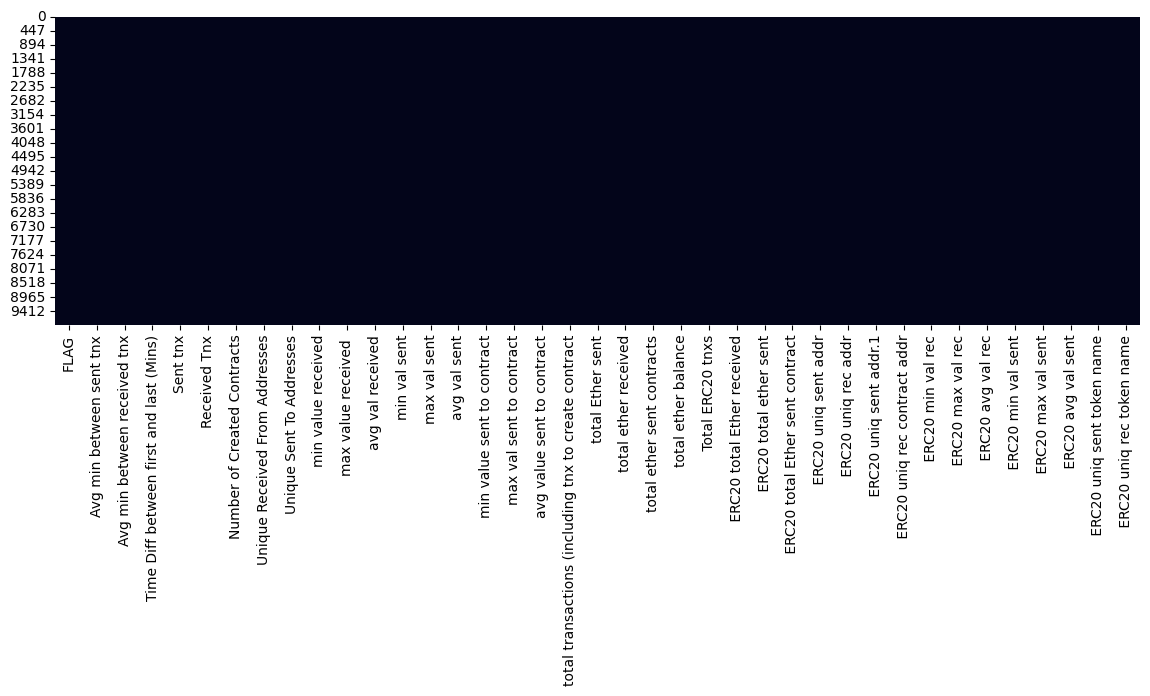

In [11]:
# Visualize missing values
plt.figure(figsize=(14,4))
sns.heatmap(df_k.isnull(), cbar=False)
plt.show()

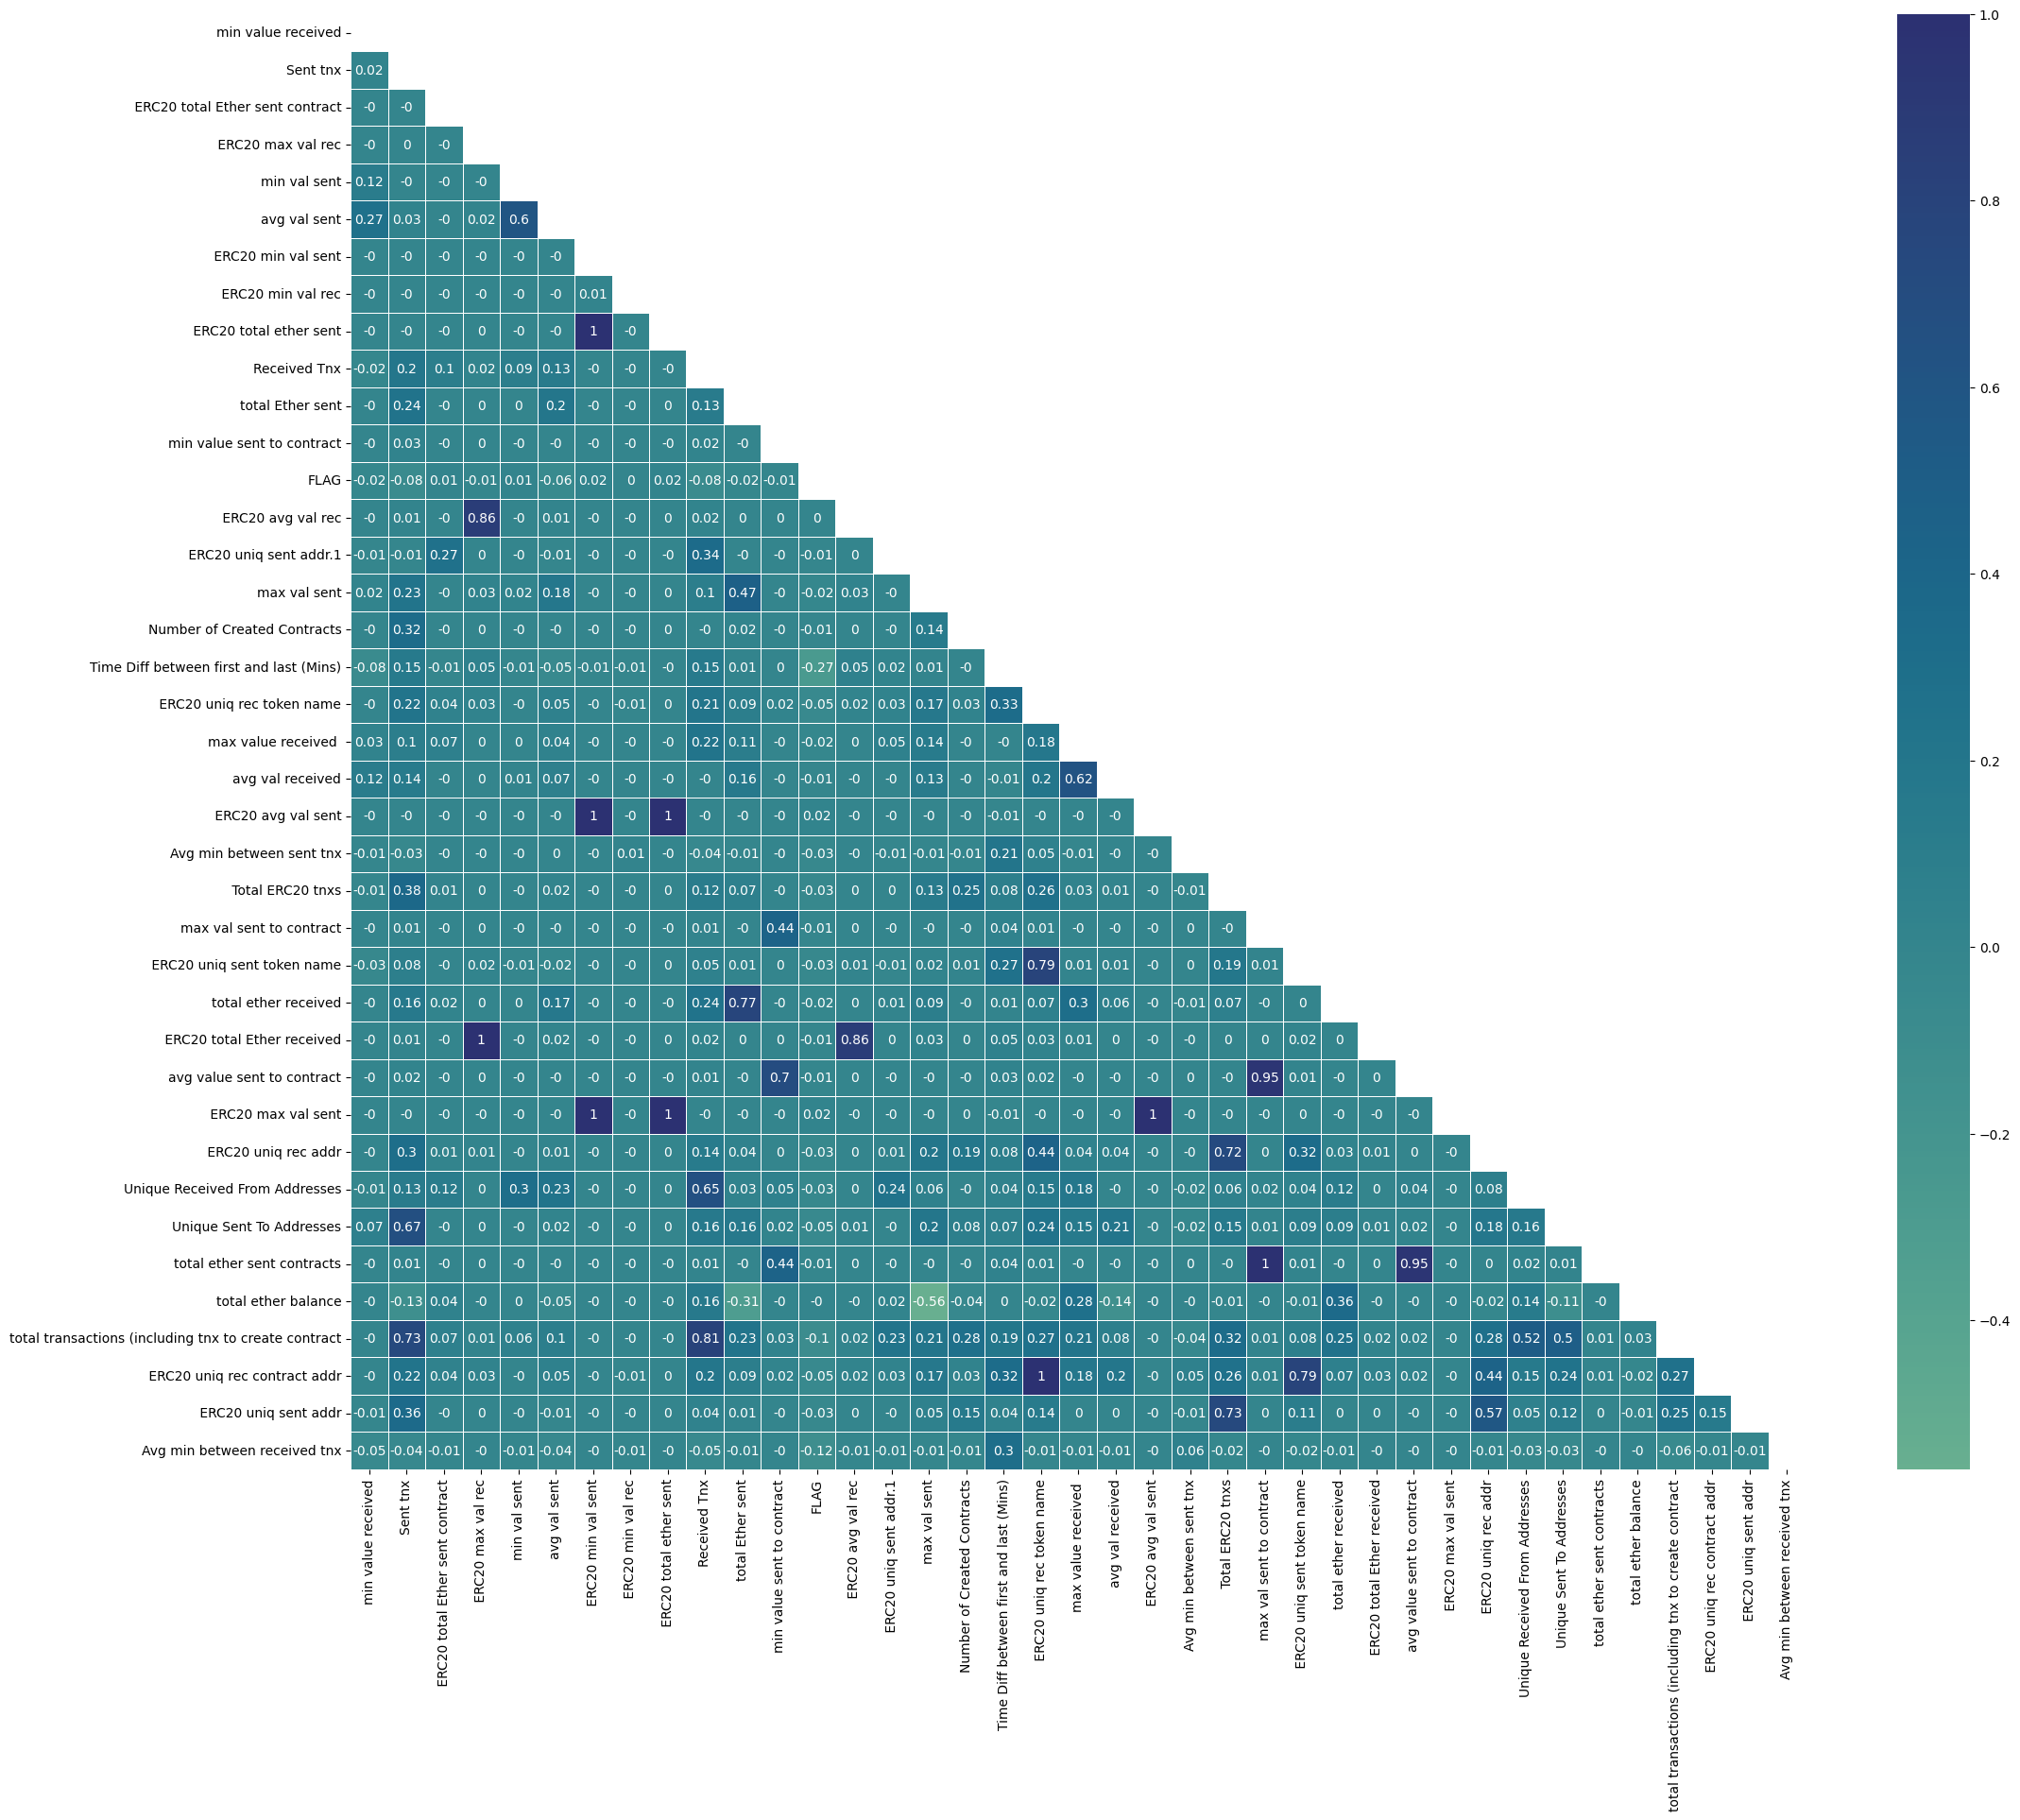

In [12]:
# Plot correlation matrix
feature_list = list(set(df_k.columns) - set(['Address']))

corr_matrix = df_k[list(set(feature_list))].corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(25, 20))
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True, cmap="crest", center=0, linewidth=.5)
plt.show()

In [13]:
# Find highly correlated features
corr_threshold = 0.7
boolean_mask = mask.astype(bool)
red_corr_matrix = corr_matrix.mask(boolean_mask)
corr_matrix_unstacked = red_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= corr_threshold].reset_index().rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature 1,feature 2,Absolute Correlation
18,max val sent to contract,total ether sent contracts,1.00
13,ERC20 uniq rec token name,ERC20 uniq rec contract addr,1.00
2,ERC20 max val rec,ERC20 total Ether received,1.00
3,ERC20 min val sent,ERC20 total ether sent,1.00
4,ERC20 min val sent,ERC20 avg val sent,1.00
5,ERC20 min val sent,ERC20 max val sent,1.00
6,ERC20 total ether sent,ERC20 avg val sent,1.00
7,ERC20 total ether sent,ERC20 max val sent,1.00
14,ERC20 avg val sent,ERC20 max val sent,1.00
20,avg value sent to contract,total ether sent contracts,0.95


In [14]:
high_corr_feature_list = ['ERC20 total ether sent',
                          'ERC20 max val sent',
                          'ERC20 min val sent',
                          'ERC20 max val rec',
                          'ERC20 total Ether received',
                          'ERC20 avg val sent',
                          'max val sent to contract',
                          'total ether sent contracts',
                          'ERC20 uniq rec contract addr',
                          'ERC20 uniq rec token name',
                          'avg value sent to contract',
                          'ERC20 avg val rec',
                          'total transactions (including tnx to create contract',
                          'ERC20 uniq sent token name',
                          'ERC20 uniq sent addr',
                          'Total ERC20 tnxs',
                          'ERC20 uniq rec addr',
                          'min value sent to contract']

df_k.columns = df_k.columns.str.strip()
df_k.drop(high_corr_feature_list, axis=1, inplace=True)

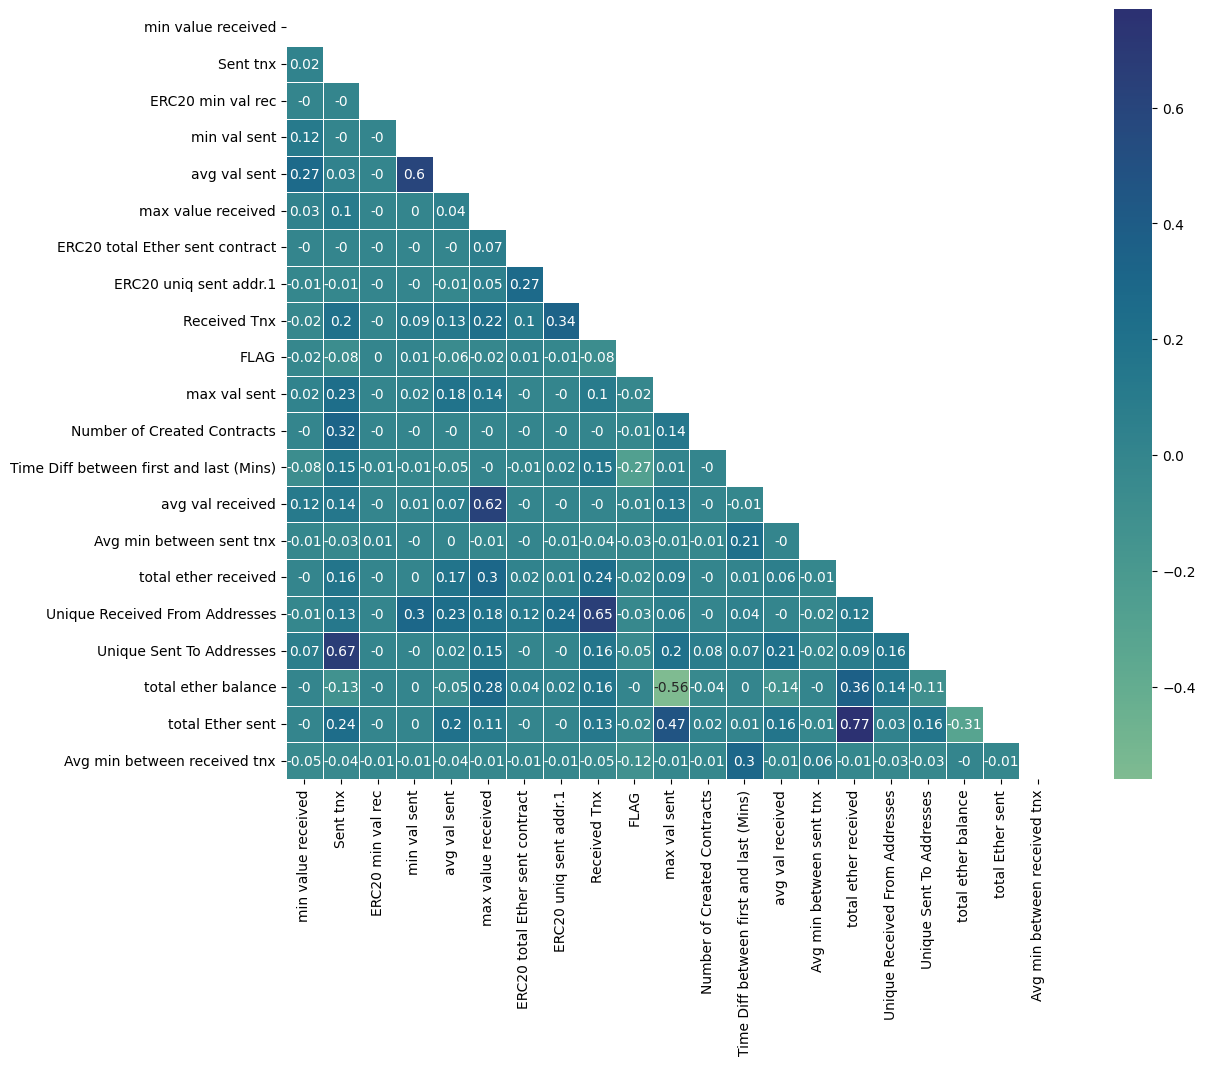

In [15]:
# Plot correlation matrix
feature_list = list(set(df_k.columns))
corr_matrix = df_k[list(set(feature_list))].corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, mask=mask, square=True, annot=True, cmap="crest", center=0, linewidth=.5)
plt.show()

In [16]:
print("Number of features: ", len(df_k.columns))
df_k.columns

Number of features:  21


Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total Ether sent', 'total ether received', 'total ether balance',
       'ERC20 total Ether sent contract', 'ERC20 uniq sent addr.1',
       'ERC20 min val rec'],
      dtype='object')

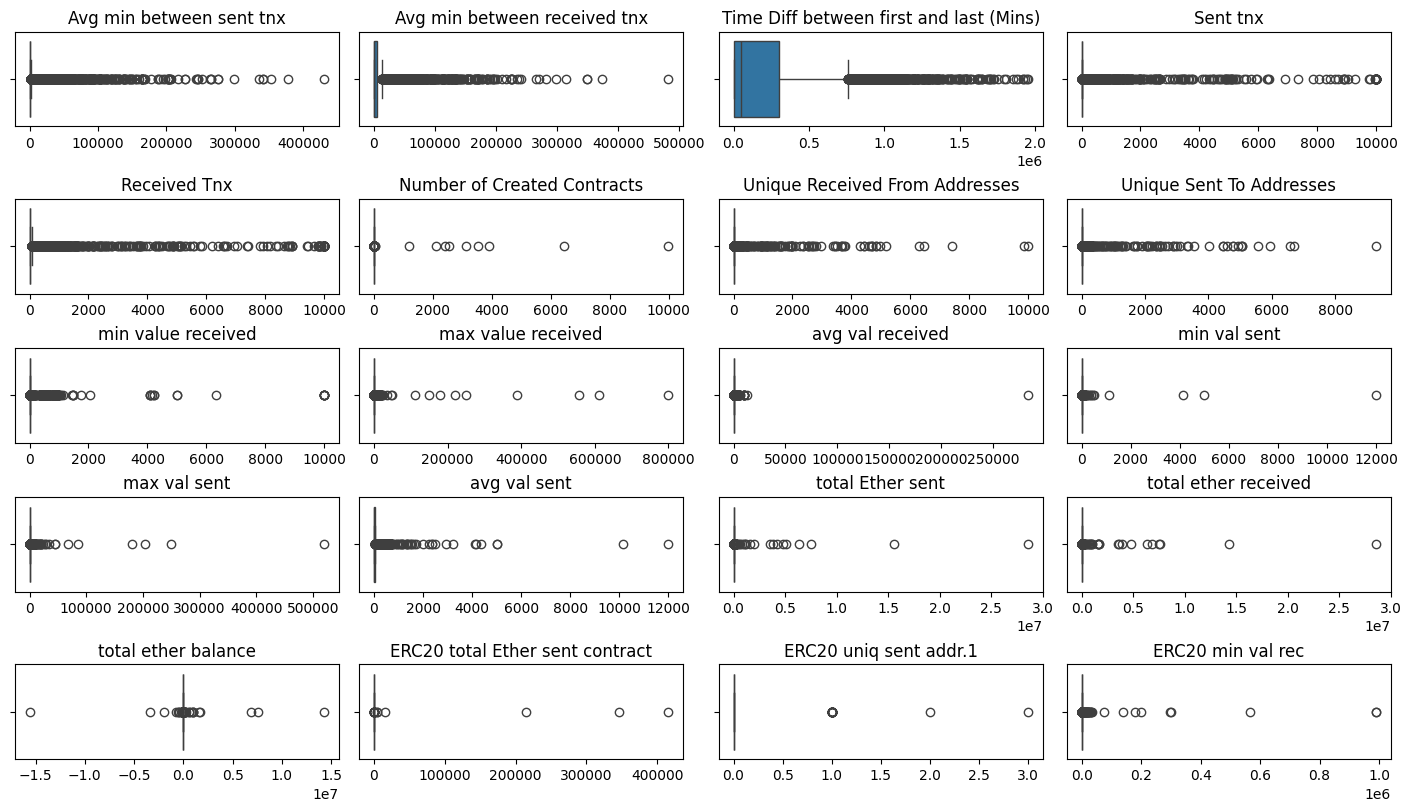

In [17]:
# Plot the distributions of features
columns = df_k.columns[1:]

fig, axes = plt.subplots(5, 4, figsize=(14, 8), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes):
        sns.boxplot(ax=axes[i], data=df_k, x=column)
        axes[i].set_title(column)
        axes[i].set_xlabel('')  # Remove x-axis label

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


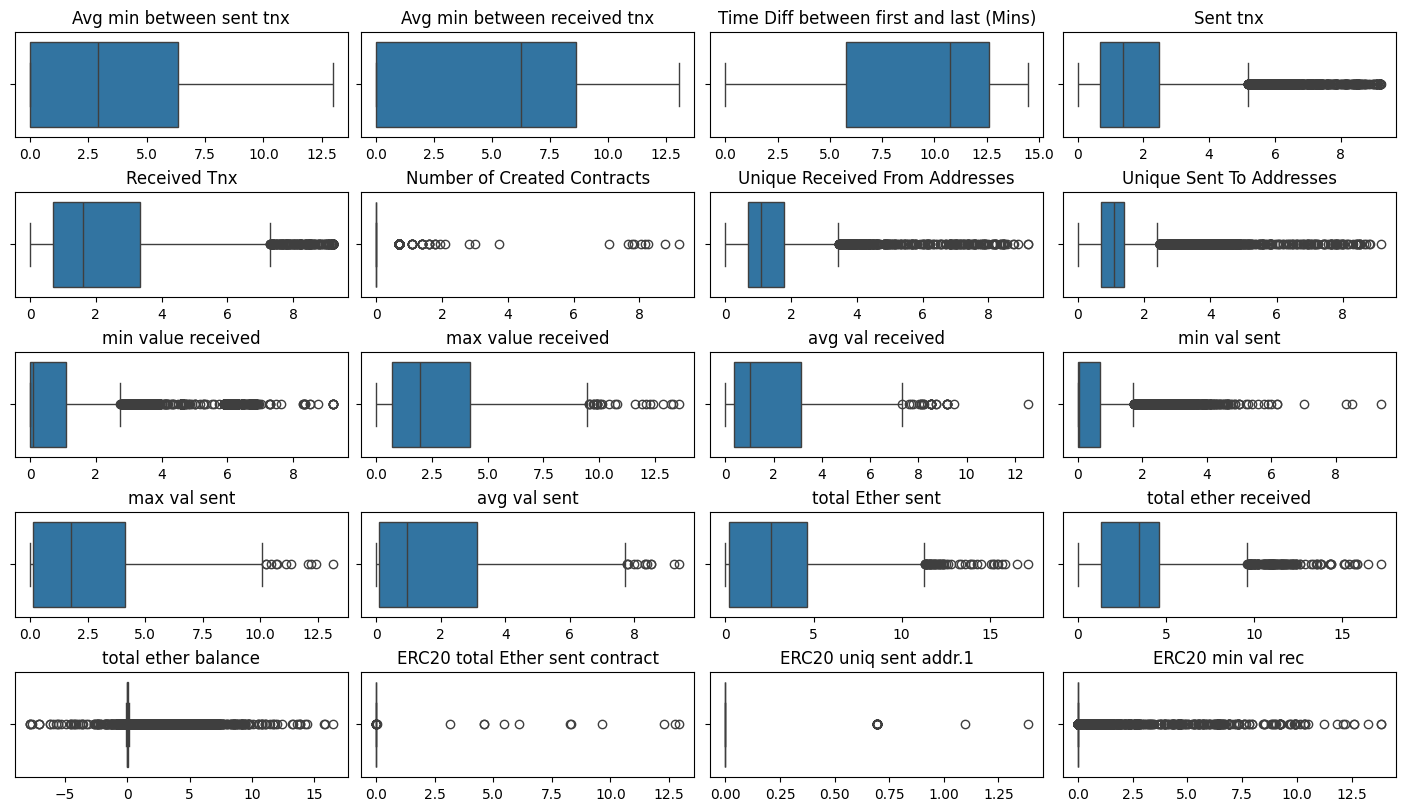

In [18]:
# Plot log transformation of the features
df_log_transformed = df_k.copy()
columns = df_k.columns[1:]

for column in columns:
    df_log_transformed[column] = np.log1p(df_k[column])

fig, axes = plt.subplots(5, 4, figsize=(14, 8), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes):
        sns.boxplot(ax=axes[i], data=df_log_transformed, x=column)
        axes[i].set_title(column)
        axes[i].set_xlabel('')  # Remove x-axis label

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [19]:
# Find features with small distribution
for i in df_k.columns[1:]:
    if len(df_k[i].value_counts()) < 10:
        print(f"Feature '{i}' has the following distribution: \n{df_k[i].value_counts()}")
        print('------------------------------------------')

Feature 'ERC20 uniq sent addr.1' has the following distribution: 
ERC20 uniq sent addr.1
0.0    9788
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64
------------------------------------------


In [20]:
# Drop features with small distribution
df_k.drop(['ERC20 uniq sent addr.1'], axis=1, inplace=True)

FLAG
0    7637
1    2179
Name: count, dtype: int64


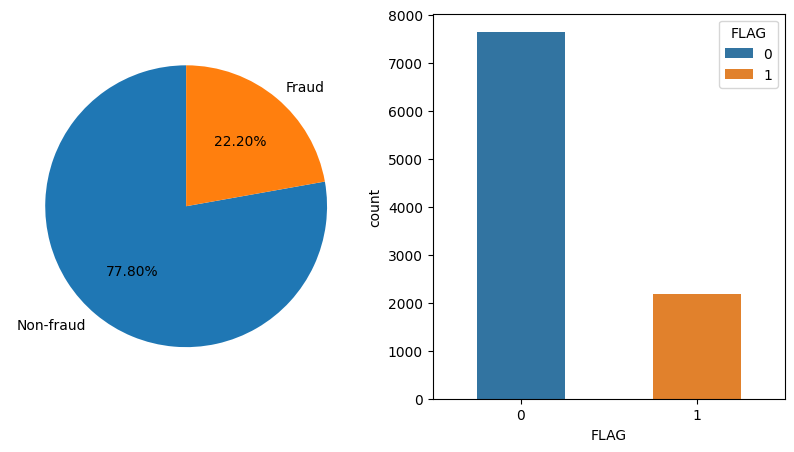

In [21]:
# Plot target distribution
print(df_k['FLAG'].value_counts())

labels = ['Non-fraud', 'Fraud']

value_counts = df_k['FLAG'].value_counts()
percentages = 100 * value_counts / value_counts.sum()

fig, ax = plt.subplots(1, 2, figsize=[10, 5])

ax[0].pie(value_counts, labels=labels, autopct='%.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
# ax[0].set_title('Target Distribution')

sns.countplot(data=df_k, x='FLAG', hue='FLAG', palette=['#1f77b4', '#ff7f0e'], dodge=False, ax=ax[1], width=0.5)
# ax[1].set_title('Count of Fraud and Non-fraud')

plt.show()

In [22]:
df_k.insert(0, 'Address', add)
df_k.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,max value received,avg val received,min val sent,max val sent,avg val sent,total Ether sent,total ether received,total ether balance,ERC20 total Ether sent contract,ERC20 min val rec
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,45.806785,6.589513,0.00,31.220000,1.200681,865.691093,586.466675,-279.224419,0.0,0.0
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.613269,0.385685,0.00,1.800000,0.032844,3.087297,3.085478,-0.001819,0.0,0.0
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,1.165453,0.358906,0.05,3.538616,1.794308,3.588616,3.589057,0.000441,0.0,0.0
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,500.000000,99.488840,0.00,450.000000,70.001834,1750.045862,895.399559,-854.646303,0.0,0.0
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,12.802411,2.671095,0.00,9.000000,0.022688,104.318883,53.421897,-50.896986,0.0,0.0


In [23]:
df_e = pd.read_csv('/content/drive/MyDrive/ethereum-fraud-detection/data/transaction_data_etherscan.csv')
df_e.drop_duplicates(subset=["Address"], inplace=True)
df_e.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.676667,15159.077780,71235.616670,5,3,0,1,1,...,0.000000,0.000000,NaN,NaN,NaN,8,0.000000,0.040100,0.0,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.016667,1124.888889,25126.450000,7,15,0,13,6,...,1.350000,0.419270,NaN,NaN,NaN,22,2.934889,2.650000,0.0,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.733333,0.000000,723.466667,2,1,0,1,2,...,2.509076,2.499538,NaN,NaN,NaN,3,4.999076,4.999916,0.0,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.000000,0.000000,0.000000,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.600000,1479.855556,45357.566670,1,21,0,21,1,...,2.084658,2.084658,NaN,NaN,NaN,22,2.084658,2.085000,0.0,0.000342


In [24]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               4339 non-null   object 
 1   FLAG                                                  4339 non-null   int64  
 2   Avg min between sent tnx                              4339 non-null   float64
 3   Avg min between received tnx                          4339 non-null   float64
 4   Time Diff between first and last (Mins)               4339 non-null   float64
 5   Sent tnx                                              4339 non-null   int64  
 6   Received Tnx                                          4339 non-null   int64  
 7   Number of Created Contracts                           4339 non-null   int64  
 8   Unique Received From Addresses                        4339

In [25]:
# Drop unique features from each datasets
features_k = set(df_k.columns)
features_e = set(df_e.columns)

unique_k = features_k - features_e
unique_e = features_e - features_k

features_to_drop_k = list(unique_k)
features_to_drop_e = list(unique_e)

df_k.drop(features_to_drop_k, axis=1, inplace=True)
df_e.drop(features_to_drop_e, axis=1, inplace=True)

In [26]:
# Merge both datasets
df_combined = pd.merge(df_e, df_k, how='outer')
df_combined.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,avg val received,min val sent,max val sent,avg val sent,total Ether sent,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.676667,15159.077780,71235.616670,5,3,0,1,1,0.010000,0.013367,0.000000,0.000000,0.000000,0.000000,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.016667,1124.888889,25126.450000,7,15,0,13,6,0.000000,0.176667,0.145000,1.350000,0.419270,2.934889,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.733333,0.000000,723.466667,2,1,0,1,2,4.999916,4.999916,2.490000,2.509076,2.499538,4.999076,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.600000,1479.855556,45357.566670,1,21,0,21,1,0.035000,0.099286,2.084658,2.084658,2.084658,2.084658,2.085000,0.000342


In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Address                                  14155 non-null  object 
 1   FLAG                                     14155 non-null  int64  
 2   Avg min between sent tnx                 14155 non-null  float64
 3   Avg min between received tnx             14155 non-null  float64
 4   Time Diff between first and last (Mins)  14155 non-null  float64
 5   Sent tnx                                 14155 non-null  int64  
 6   Received Tnx                             14155 non-null  int64  
 7   Number of Created Contracts              14155 non-null  int64  
 8   Unique Received From Addresses           14155 non-null  int64  
 9   Unique Sent To Addresses                 14155 non-null  int64  
 10  min value received                       14155

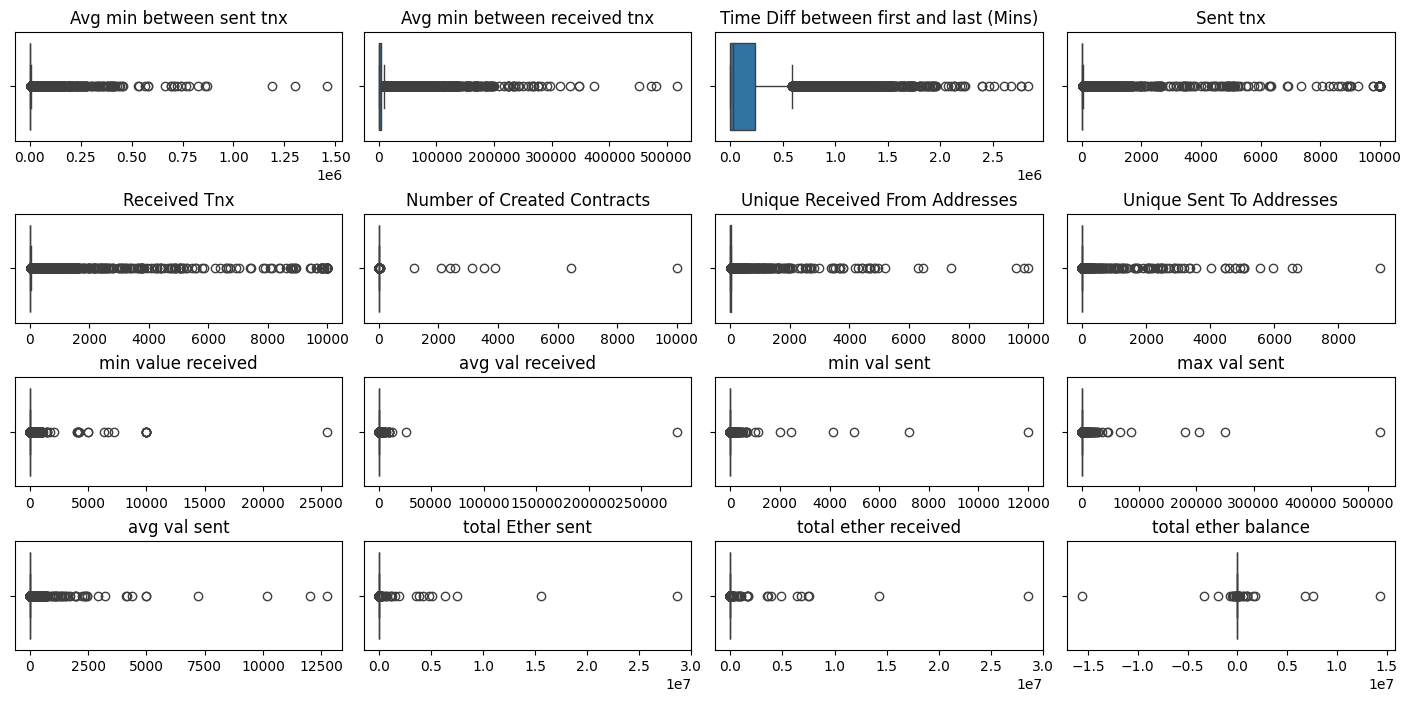

In [28]:
# Plot the distributions of features
columns = df_combined.columns[2:]

fig, axes = plt.subplots(5, 4, figsize=(14, 8), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes):
        sns.boxplot(ax=axes[i], data=df_combined, x=column)
        axes[i].set_title(column)
        axes[i].set_xlabel('')  # Remove x-axis label

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


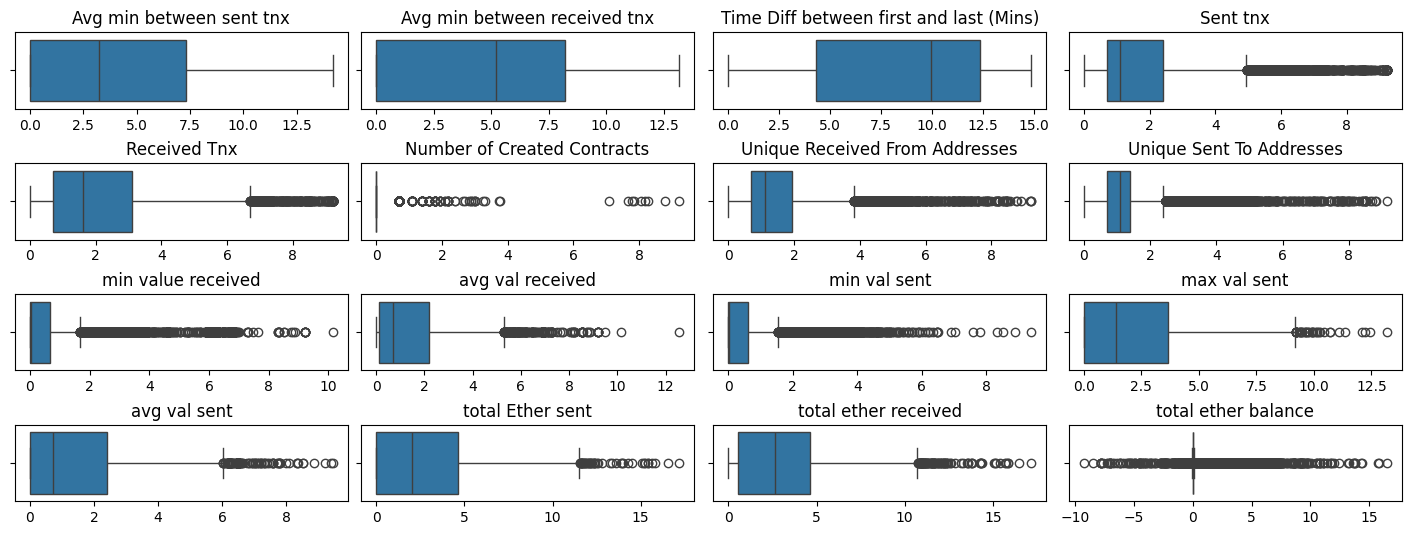

In [29]:
# Plot log transformation of the features
df_log_transformed = df_combined.copy()
columns = df_combined.columns[2:]

for column in columns:
    df_log_transformed[column] = np.log1p(df_combined[column])

fig, axes = plt.subplots(5, 4, figsize=(14, 6), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    if i < len(axes):
        sns.boxplot(ax=axes[i], data=df_log_transformed, x=column)
        axes[i].set_title(column)
        axes[i].set_xlabel('')  # Remove x-axis label

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

FLAG
0    7637
1    6518
Name: count, dtype: int64


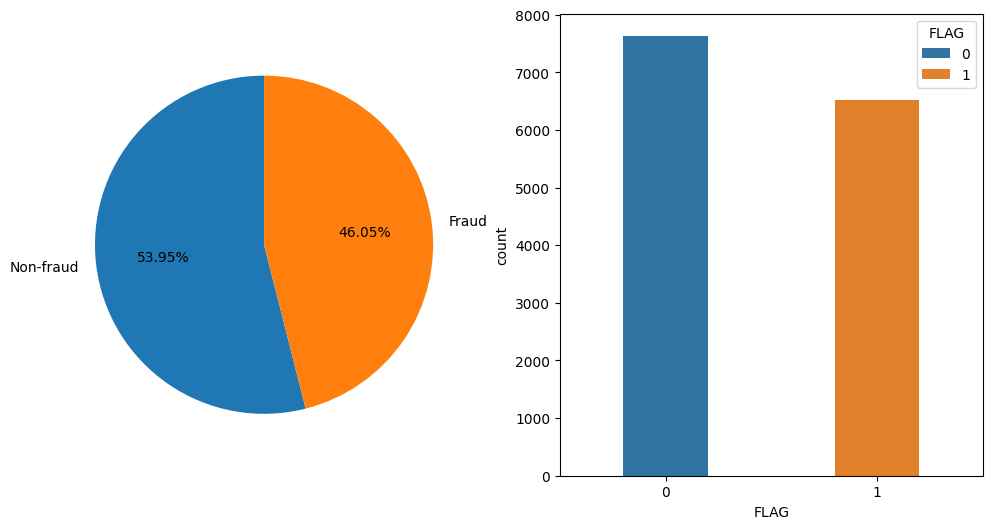

In [30]:
# Plot target distribution
print(df_combined['FLAG'].value_counts())

labels = ['Non-fraud', 'Fraud']

value_counts = df_combined['FLAG'].value_counts()
percentages = 100 * value_counts / value_counts.sum()

fig, ax = plt.subplots(1, 2, figsize=[12, 6])

ax[0].pie(value_counts, labels=labels, autopct='%.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
# ax[0].set_title('Target Distribution')

sns.countplot(data=df_combined, x='FLAG', hue='FLAG', palette=['#1f77b4', '#ff7f0e'], dodge=False, ax=ax[1], width=0.4)
# ax[1].set_title('Count of Fraud and Non-fraud')

plt.show()

In [31]:
df_combined['Address'].nunique() == df_combined.shape[0]

True

In [32]:
# df_combined.to_csv('/content/drive/MyDrive/ethereum-fraud-detection/data/combined_kaggle_etherscan_data.csv')